### 240102 데이터 전처리(이상치 제거)
- 산업군, 직업 이상치 처리

In [6]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 데이터 불러오기
train_df = pd.read_csv('../datasets/data_con/train.csv')

In [8]:
train_df.head(1)

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.00496,1,0,0,Unknown,4.0,기타 1,39,1000,23.0


In [9]:
train_copy = train_df.copy()

#### 데이터 전처리
- 산업군 컬럼 이상치 처리

In [10]:
# 앞글자가 사업인 행들만 뽑아내기
train_df[train_df['산업군'].str[:2]=='사업']

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0
4,TRAIN_00004,0,여성,0,1,0,26550000.0,근로자,고등학교 졸업,기혼,...,0.025164,1,1,0,Unknown,2.0,사업 2,38,0,4.0
6,TRAIN_00006,0,여성,0,1,0,37170000.0,근로자,고등학교 졸업,미혼,...,0.011657,1,1,0,단순 노동자,1.0,사업 2,52,8,23.0
7,TRAIN_00007,0,남성,1,1,1,42480000.0,기타,고등학교 졸업,기혼,...,0.009630,1,1,0,기술직,3.0,사업 2,46,8,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59965,TRAIN_59965,0,여성,0,1,0,37170000.0,기타,대학교 중퇴,기혼,...,0.072508,1,1,0,Unknown,2.0,사업 1,29,0,11.0
59968,TRAIN_59968,0,남성,1,1,0,69030000.0,기타,대학교 졸업 이상,기혼,...,0.072508,1,1,0,요식업 종사자,2.0,사업 2,21,2,20.0
59970,TRAIN_59970,0,남성,0,1,0,42480000.0,근로자,고등학교 졸업,기혼,...,0.028663,1,1,0,운전자,2.0,사업 0,46,12,4.0
59982,TRAIN_59982,0,남성,0,0,0,42480000.0,근로자,고등학교 졸업,미혼,...,0.046220,1,1,1,운전자,1.0,사업 1,30,0,16.0


In [11]:
# 사업 0,1 ..데이터들을 모두 사업으로 통일
train_copy.loc[train_copy['산업군'].str[:2] == '사업', '산업군'] = '사업'

In [12]:
# 기타 0,1 데이터들을 모두 기타으로 통일
train_copy.loc[train_copy['산업군'].str[:2] == '기타', '산업군'] = '기타'

In [13]:
# 무역 0,1,..,6 데이터들을 모두 무역으로 통일
train_copy.loc[train_copy['산업군'].str[:2] == '무역', '산업군'] = '무역'

In [14]:
# 산업군 컬럼 내에서 무역 개수
train_copy[train_copy['산업군'].str.contains('무역')].shape[0]

2666

In [15]:
# 산업 0,1,..,12 데이터들을 모두 산업으로 통일
train_copy.loc[train_copy['산업군'].str[:2] == '산업', '산업군'] = '산업'

In [16]:
# 운송 0,1,..,3 데이터들을 모두 운송으로 통일
train_copy.loc[train_copy['산업군'].str[:2] == '운송', '산업군'] = '운송'

In [17]:
# '산업군' 컬럼의 데이터 구성 확인
print(train_copy['산업군'].value_counts())

산업군
사업         16343
기타         14467
자영업         7549
산업          2715
무역          2666
의학          2181
정부          2021
운송          1755
학교          1731
건설          1376
유치원         1339
보안           674
주택           575
군대           508
농업           494
은행           466
경찰           435
우체부          424
국가 안보        383
레스토랑         344
서비스          291
대학교          269
호텔           187
전기           173
보험           122
통신           101
부동산 중개업       80
문화            79
광고            72
모바일           60
법률 서비스        56
환경            48
종교            16
Name: count, dtype: int64


C:\Users\gusdk\AppData\Local\Temp\ipykernel_1332\526402274.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


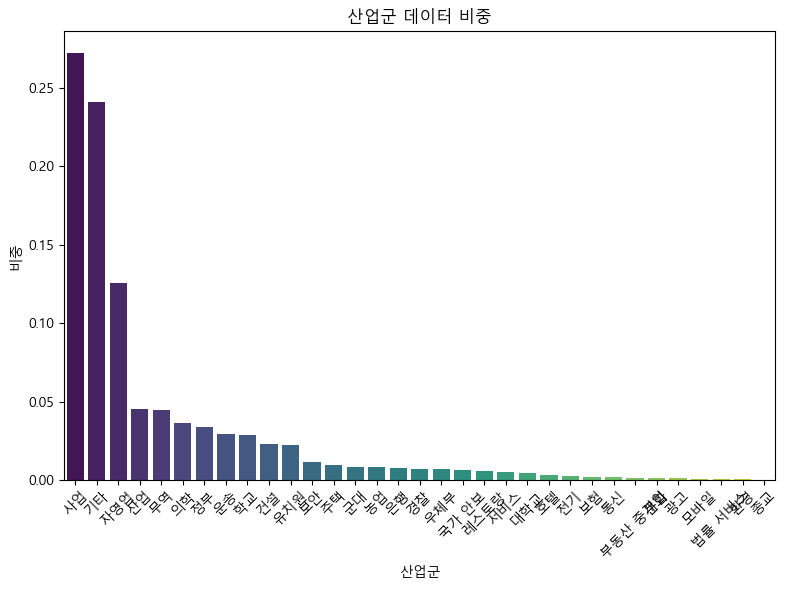

In [18]:
# '산업군' 컬럼의 데이터 비중을 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'

industry_counts = train_copy['산업군'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xlabel('산업군')
plt.ylabel('비중')
plt.title('산업군 데이터 비중')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

- 직업 컬럼 이상치 제거

In [19]:
# 직업이 Unknown인 행 존재
train_copy[train_copy['직업']=='Unknown']

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타,39,1000,23.0
3,TRAIN_00003,0,여성,1,0,1,38232000.0,기타,고등학교 졸업,기혼,...,0.004849,1,1,0,Unknown,3.0,산업,34,6,12.0
4,TRAIN_00004,0,여성,0,1,0,26550000.0,근로자,고등학교 졸업,기혼,...,0.025164,1,1,0,Unknown,2.0,사업,38,0,4.0
10,TRAIN_00010,0,여성,0,1,0,30798000.0,연금수령자,고등학교 졸업,기혼,...,0.006671,1,0,0,Unknown,2.0,기타,61,1000,8.0
12,TRAIN_00012,1,여성,0,1,1,10620000.0,근로자,고등학교 졸업,기혼,...,0.009175,1,1,0,Unknown,3.0,학교,43,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,TRAIN_59986,0,여성,0,1,0,26550000.0,연금수령자,고등학교 졸업,사별,...,0.035792,1,0,0,Unknown,1.0,기타,67,1000,21.0
59989,TRAIN_59989,0,여성,0,0,0,58410000.0,근로자,고등학교 졸업,사실혼,...,0.018634,1,1,0,Unknown,2.0,기타,46,8,1.0
59991,TRAIN_59991,0,여성,0,1,0,47790000.0,연금수령자,고등학교 졸업,기혼,...,0.007305,1,0,0,Unknown,2.0,기타,56,1000,4.0
59995,TRAIN_59995,0,여성,0,1,0,15930000.0,연금수령자,고등학교 졸업,미혼,...,0.014520,1,0,0,Unknown,1.0,기타,60,1000,29.0


In [20]:
# 근속연수가 1000인 데이터가 11,275개 존재
(train_copy['근속연수']==1000).value_counts()

근속연수
False    48725
True     11275
Name: count, dtype: int64

In [21]:
# 직업이 Unknown인 데이터가 19,035개 존재
(train_copy['직업']=='Unknown').value_counts()

직업
False    40965
True     19035
Name: count, dtype: int64

In [22]:
# 근속연수가 1000이면서 직업이 Unknown인 데이터는 11,274개 존재
result= (train_copy['직업']=='Unknown')& (train_copy['근속연수']==1000)
result.value_counts()

False    48726
True     11274
Name: count, dtype: int64

In [23]:
# 근속연수가 1000이면서 직업이 Unknown이 아닌 데이터가 몇 번째 행에 있는지
train_copy[(train_copy['근속연수']==1000)&(train_copy['직업']!='Unknown')].index

Index([5820], dtype='int64')

In [24]:
train_copy.loc[5820,'직업']

'미화원'

In [25]:
# 근속연수가 1000이 아니면서 직업이 Unknown인 데이터가 몇 번째 행에 있는지
((train_copy['근속연수']!=1000)&(train_copy['직업']=='Unknown')).value_counts()

False    52239
True      7761
Name: count, dtype: int64

In [26]:
# 근속연수가 1000이면서 직업이 Unknown이지 않은 사람의 직업은 미화원 딱 한 명 존재
# 근속연수가 1000이면 직업이 미화원인 데이터 하나 빼고 다 Unknown

In [27]:
# 수입 유형이 연금수령자인 데이터 11,274개 존재
(train_copy['수입 유형']=='연금수령자').value_counts()

수입 유형
False    48726
True     11274
Name: count, dtype: int64

In [28]:
# 수입 유형이 연금수령자이면서 근속 연수가 1000
((train_copy['수입 유형']=='연금수령자')&(train_copy['근속연수']==1000)).value_counts()

False    48729
True     11271
Name: count, dtype: int64

In [29]:
# 수입 유형이 연금수령자가 아니고 근속연수가 1000
((train_copy['수입 유형']!='연금수령자')&(train_copy['근속연수']==1000)).value_counts()

False    59996
True         4
Name: count, dtype: int64

In [30]:
train_copy[(train_copy['수입 유형']!='연금수령자')&(train_copy['근속연수']==1000)].index

Index([5008, 5446, 36929, 57512], dtype='int64')

In [31]:
display(train_copy.loc[5008,'수입 유형'])
display(train_copy.loc[5446,'수입 유형'])
display(train_copy.loc[36929,'수입 유형'])
display(train_copy.loc[57512,'수입 유형'])

'실직자'

'실직자'

'실직자'

'실직자'

In [32]:
# 근속 연수가 1000이면서 수입 유형이 연금수령자가 아닌 사람은 실직자임
# -> 실직자 drop

In [33]:
# 수입유형이 연금수령자면서 근속연수가 1000이 아닌 데이터
train_copy[((train_copy['수입 유형']=='연금수령자')&(train_copy['근속연수']!=1000))].index

Index([1432, 21745, 41520], dtype='int64')

In [34]:
display(train_copy.loc[1432,'근속연수'])
display(train_copy.loc[21745,'근속연수'])
display(train_copy.loc[41520,'근속연수']) # outlier라고 간주하고 제거하기

5

6

3

In [35]:
# 대부분의 연금수령자의 근속연수는 1000
# 근속연수가 1000인 데이터 중에 연금수령자가 아닌 데이터는?
# -> 실직자 (4개의 데이터 존재)
# 즉 근속연수 1000인 데이터의 직업은 연금수령자와 실직자

# 그렇다면 모든 연금수령자의 근속연수는 모두 1000인가? -> No (3개의 데이터 존재)
# outlier로 간주하고 제거하기

In [36]:
train_copy[train_copy['수입 유형']=='실직자'] # 실직자의 근속연수는 모두 1000

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
5008,TRAIN_05008,0,여성,0,1,0,6372000.0,실직자,고등학교 졸업,사실혼,...,0.025164,1,0,0,Unknown,2.0,기타,47,1000,15.0
5446,TRAIN_05446,0,여성,0,0,1,12744000.0,실직자,대학교 졸업 이상,사실혼,...,0.020713,1,0,0,Unknown,3.0,기타,36,1000,19.0
36929,TRAIN_36929,0,남성,1,1,0,63720000.0,실직자,대학교 졸업 이상,미혼,...,0.019689,1,0,0,Unknown,1.0,기타,25,1000,11.0
57512,TRAIN_57512,0,여성,1,1,0,6265800.0,실직자,고등학교 졸업,사별,...,0.004960,1,0,0,Unknown,1.0,기타,55,1000,10.0


In [37]:
train_copy['직업'].value_counts()

직업
Unknown      19035
단순 노동자       10780
영업직           6178
핵심 노동자        5194
관리직           4264
운전자           3572
기술직           2240
회계사           1908
의료 업계 종사자     1671
보안 업계 종사자     1384
조리사           1187
미화원            889
가정부            458
저임금 노동자        379
비서             252
요식업 종사자        248
부동산중개업자        154
인사 담당자         120
IT 업계 종사자       87
Name: count, dtype: int64

In [38]:
train_copy['산업군'].value_counts()

산업군
사업         16343
기타         14467
자영업         7549
산업          2715
무역          2666
의학          2181
정부          2021
운송          1755
학교          1731
건설          1376
유치원         1339
보안           674
주택           575
군대           508
농업           494
은행           466
경찰           435
우체부          424
국가 안보        383
레스토랑         344
서비스          291
대학교          269
호텔           187
전기           173
보험           122
통신           101
부동산 중개업       80
문화            79
광고            72
모바일           60
법률 서비스        56
환경            48
종교            16
Name: count, dtype: int64

### 240103

In [39]:
# 나이와 가입연수 비교해서 이상치 확인
# 자녀 수와 가족 수
# 직업이 산업군과 일치하는지
# 일치하지 않을 경우, 직업 기준으로 산업군 replace
# 산업군은 가중치를 적게

# 산업군과 직업을 결합하여 새로운 파생변수 생성
# 같은 직업이어도 산업군별로 다른 특성을 가질 수 있음 / 동일한 직업-산업별 격차 동일산업-다른 직업별 격차

# 휴대전화 소유여부 < 업무용 휴대전화 소유여부 -> 이상치 처리(drop)
# 자녀수 10 이상인 데이터 drop


In [40]:
train_copy['나이'].describe()

count    60000.000000
mean        44.021183
std         11.852450
min         21.000000
25%         34.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: 나이, dtype: float64

In [41]:
train_copy['가족 구성원 수'].describe()

count    60000.000000
mean         2.155767
std          0.908213
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: 가족 구성원 수, dtype: float64

In [42]:
train_copy['자녀 수'].describe()

count    60000.000000
mean         0.412050
std          0.723998
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: 자녀 수, dtype: float64

In [43]:
train_copy[train_copy['나이']-train_copy['가입연수'] < 18]

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타,39,1000,23.0
13,TRAIN_00013,1,남성,1,1,0,47790000.0,기타,대학교 졸업 이상,미혼,...,0.011703,1,1,0,요식업 종사자,1.0,사업,31,1,31.0
18,TRAIN_00018,0,여성,0,1,0,21240000.0,근로자,고등학교 졸업,기혼,...,0.030755,1,1,0,단순 노동자,2.0,자영업,34,8,18.0
24,TRAIN_00024,0,남성,1,0,0,42480000.0,기타,고등학교 졸업,기혼,...,0.004960,1,1,0,관리직,2.0,레스토랑,41,0,25.0
25,TRAIN_00025,0,여성,0,0,0,27612000.0,근로자,고등학교 졸업,미혼,...,0.046220,1,1,0,단순 노동자,1.0,산업,51,1,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59981,TRAIN_59981,0,남성,0,1,0,66906000.0,기타,대학교 중퇴,미혼,...,0.006008,1,1,0,핵심 노동자,1.0,자영업,23,3,17.0
59982,TRAIN_59982,0,남성,0,0,0,42480000.0,근로자,고등학교 졸업,미혼,...,0.046220,1,1,1,운전자,1.0,사업,30,0,16.0
59990,TRAIN_59990,0,여성,0,1,0,15930000.0,기타,고등학교 졸업,사별,...,0.002042,1,1,0,단순 노동자,1.0,서비스,42,7,25.0
59994,TRAIN_59994,1,여성,0,1,1,37170000.0,근로자,고등학교 졸업,미혼,...,0.026392,1,1,1,단순 노동자,2.0,무역,28,5,20.0


### 240104 데이터 전처리

In [54]:
train_copy['수입'] = train_copy['연간 수입'] / 1000

In [59]:
train_copy.drop(['수입'], axis=1, inplace=True)

In [66]:
train_copy['연간 수입'].describe()

count    6.000000e+04
mean     3.983699e+07
std      2.472331e+07
min      6.265800e+06
25%      2.655000e+07
50%      3.504600e+07
75%      4.779000e+07
max      2.124000e+09
Name: 연간 수입, dtype: float64

In [67]:
train_copy['근속연수'].describe()

count    60000.000000
mean       192.906833
std        388.292796
min          0.000000
25%          2.000000
50%          6.000000
75%         16.000000
max       1000.000000
Name: 근속연수, dtype: float64